In [188]:
import pandas as pd 

path = 'tree_data/corr2.csv'

df = pd.read_csv(path)
df = df[['batch_size', 'learning_rate','dropout', 'activation', 'optimizer', 'val_loss']].dropna()
df

,batch_size,learning_rate,dropout,activation,optimizer,val_loss
1,10,0.000010,0.2,tanh,Adadelta,0.050263
2,45,0.000075,0.2,relu,Adam,0.047509
3,30,0.000010,0.2,tanh,Adadelta,0.076150
4,45,0.000075,0.8,tanh,Adam,0.047265
5,20,0.000025,0.6,relu,Adam,0.048209
6,30,0.000025,0.8,tanh,Adadelta,0.052599
7,45,0.000100,0.8,relu,Adadelta,0.049834


In [189]:
import category_encoders as ce 

encoder = ce.OneHotEncoder(use_cat_names=True)
X = encoder.fit_transform(df[['learning_rate','dropout', 'batch_size', 'activation', 'optimizer']])
y = df['val_loss']

c:\Users\viet tran\Desktop\Masterthesis\Program\venv_cnn\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\viet tran\Desktop\Masterthesis\Program\venv_cnn\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [235]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# X_train, X_val, y_train,  y_val = train_test_split(X, y)

# model = DecisionTreeRegressor(criterion='absolute_error')
model = RandomForestRegressor(criterion='absolute_error')
model.fit(X, y)


RandomForestRegressor(criterion='absolute_error')

In [236]:
# from dtreeviz.trees import dtreeviz
# viz = dtreeviz(model, X_train, y_train, feature_names=X_train.columns)
# viz.save('dtreeviz.svg')

In [237]:
# import matplotlib

#high quality tree plot
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(150, 100)
# tree.plot_tree(model)

In [238]:
# Permutation algorithm

tmp  = permutation_importance(model, X, y, n_repeats=5)
feature_names = [f'{i}' for i in X.columns]
per_importance = pd.Series(tmp.importances_mean, index=feature_names).sort_values(ascending=False)
per_importance

batch_size            0.444930
learning_rate         0.351322
dropout               0.127922
optimizer_Adam        0.111155
optimizer_Adadelta    0.061811
activation_tanh       0.028949
activation_relu       0.023466
dtype: float64

In [239]:
import plotly.express as px 

# Plot permutation importance

fig = px.bar(per_importance, text=np.around(per_importance.values, 3), 
            title='Hyperparameter importance',
            labels={'value': 'Permutation importance', 'index': ''})
fig.show()

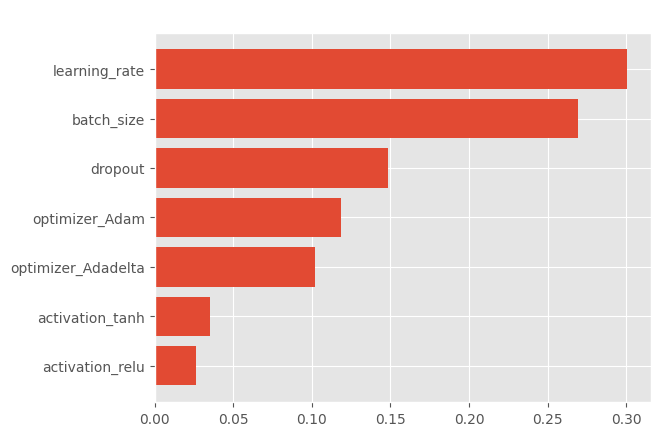

In [240]:
#Plot hyper importance 
from sklearn.tree import plot_tree
import graphviz
import seaborn as sns

importance = model.feature_importances_
indices = np.argsort(importance)
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.title("Hyperparameter importance", loc='center')
plt.show()

In [241]:
#plot tree structure

tree_viz = tree.export_graphviz(model, feature_names=X.columns,
                                class_names=y.name, filled=True)
graph = graphviz.Source(tree_viz)
graph

AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

<AxesSubplot: >

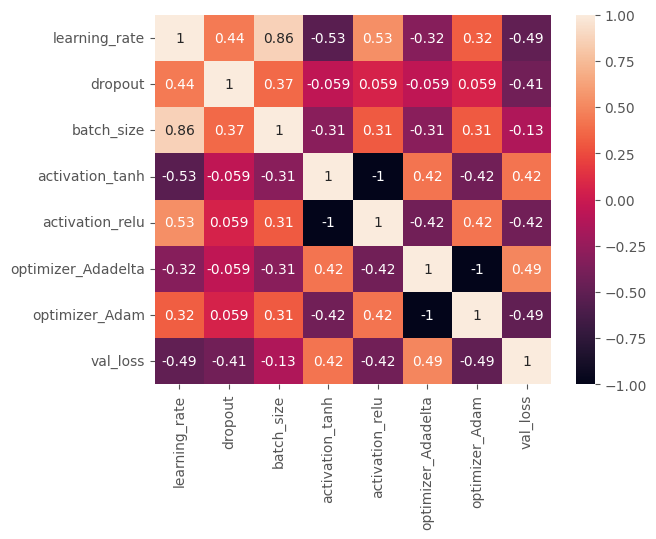

In [ ]:
# plt.figure(figsize=(15,15))
Z = pd.concat([X, y], axis=1)
sns.heatmap(Z.corr(), annot=True)

In [ ]:
# import scipy
# corr_tmp, p_val_tmp = [], []
# for i in X.columns:
#     corr, p_val = scipy.stats.pearsonr(X[i], y)
#     corr_tmp.append(corr)
#     p_val_tmp.append(p_val)

# tmp = [np.array(corr_tmp), np.array(p_val_tmp)]
# df_corr = pd.DataFrame(data=tmp, columns=X.columns, index=['val_loss', 'p-value'])
# sns.heatmap(df_corr, annot=True)
# sns.set(rc={'figure.figsize':(10, 5)})